### 목차

• 지도 학습 알고리즘
1.   kNN의 이해, 구현 및 실습
2.   Decision Tree 이해, 구현 및 실습
3.   SVM 이해 및 실습

• 비지도 학습 알고리즘
1.   K-means의 이해, 구현 및 실습
2.   주성분분석(PCA) 이해, 구현 및 실습
3.   t-SNE를 이용한 매니폴드 학습 이해 및 실습

### 1. 지도학습 -> 지도 학습 알고리즘은 예를 통해 학습하도록 설계

kNN 알고리즘 -> k개의 가장 가까운 이웃 알고리즘
• k-Nearest Neighbor(kNN) 알고리즘은 모든 기계 학습 알고리즘 중에서도 가장 
간단하고 이해하기 쉬운 분류 알고리즘
⁻   지도 학습에 해당
⁻   특징 공간(feature space): 모든 데이터가 투영되는 공간
⁻   특징 공간에 데이터를 표시 = kNN 알고리즘의 학습 = 게으른 학습(lazy learning)


• 새로운 데이터가 입력되면? (그래프 상에 별표로 표시)
⁻   파란색 사각형과 빨강색 원 중에서 하나에 속해야 함 → 분류(classification)

#### 수정된  KNN 알고리즘
•  KNN 알고리즘은 k개의 모든 이웃이 동등한 중요성을 가짐


• 더 가까운 이웃에 더 높은 가중치를 주고, 멀리 있는 이웃에는 낮은 가중치
• 새 데이터와 거리를 가중치로 활용 → 가중치 합이 가장 큰 클래스로 분류

#### kNN 알고리즘의  장단점
• 장점
⁻   구현하기가 매우 쉬움 
⁻   훈련이 필요 없음
• SVM, 선형 회귀 등과 같이 훈련이 필요한 알고리즘보다 훨씬 더 빠름
• 새 데이터를 원활하게 추가 가능
⁻   KNN을 구현하는 데 필요한 매개 변수는 두 개 뿐
• K 값과 거리 함수(예 : 유클리드 또는 맨해튼 등)
• 단점
⁻   차원 수가 높아지면 각 차원에서 거리를 계산하기 어렵기 때문에 고차원 데이터에서는 잘 작동 X 
⁻   새 데이터와 기존 모든 지점 간의 거리를 계산하는 비용이 더 높기 때문에 대규모 데이터 세트에 대한 예측 비용이 높음

### sklearn을  이용한  kNN 알고리즘  실습

• sklearn 라이브러리의 아이리스 데이터 세트
아이리스 데이터 세트에는 150개의 아이리스 꽃 샘플 
⁻ 꽃받침 크기, 꽃잎 크기, 꽃이름(setosa, versicolor, virginica)

In [1]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Print the data
print(iris.data)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [2]:
# 4개의 특징 이름을 출력한다.
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# 정수는 꽃의 종류를 나타낸다. -> 0 = setosa, 1 = versicolor 2 = virginica
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
# 학습 데이터와 실험 데이터 분할
from sklearn.model_selection import train_test_split 
X = iris.data
y = iris.target

# (80:20)으로 분할한다.

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=4) 

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [5]:
# kNN 학습
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
# weights=‘uniform’, ‘distance’
knn = KNeighborsClassifier(n_neighbors=6, weights='distance') # n_ 의미 -> number of
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9666666666666667


In [6]:
# kNN을 이용한 새 데이터 분류

# 새로운 데이터 예측
x_new = [[3,4,5,2], [5,4,2,2]]
y_predict = knn.predict(x_new)
# 0=setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor', 2:'virginica'} 
print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


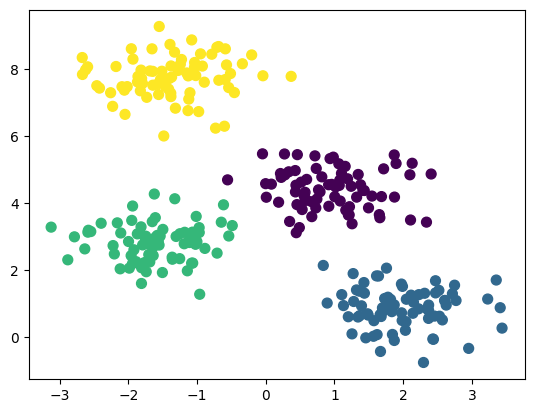

In [7]:
# [실습] 간단한  랜덤  데이터  생성  방법
# sklearn.datasets의 make_blobs()하는 함수 이용 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0) 
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50)
plt.show()

In [8]:
# sklea.datasets의 make_blobs()하는 함수 이용
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier 

x, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50)
# plt.show()

knn = KNeighborsClassifier(n_neighbors=6, weights ='distance')
knn.fit(X, y_true)

x_new = [3,4,5,2]
y_predict = knn.predict(x_new)

# 0=setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor', 2:'virginica'}

print(classes[y_predict])

ValueError: Expected 2D array, got 1D array instead:
array=[3 4 5 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Decision Tree
• 결정트리, 의사결정트리(Decision Tree)
• 분류, 회귀 문제에 모두 가능한 지도 학습 모델
• 데이터로부터 학습하여 결정트리를 자동으로 생성

• 접근 방법 
⁻   스무고개?
⁻   정답에 가장 빨리 도달하는
예/아니오 질문 목록을 학습
⁻   연속적인 데이터에 적용할 테스트는 
“특징 i는 값 a보다 큰가?”와 같은 형태

### Decision Tree 생성  원리
• 최대한 많이 데이터를 분류할 수 있는 지점을 선택하여 공간 분할
• 분할된 공간을 순수 노드(pure node)가 나올 때까지 반복적으로 분할

In [9]:
# Decision Tree – 유방암  데이터  학습
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0) 
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train))) 
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


### Decision Tree 복잡도  제어

• 결정트리는 모든 리프노드가 순수 노드가 될 때까지 동작   
→ 과대적합, 모델이 지나치게 복잡해짐  
• 과대적합을 방지하는 방법 = 가지치기  
⁻   가지치기(pruning) 또는 사후 가지치기(post-pruning)  
• 트리를 생성한 뒤, 데이터 포인트가 작은 노드는 삭제하거나 병합   
⁻   사전 가지치기(pre-pruning)  
• 트리의 최대 깊이 제한 = max_depth  
• 리프 노드의 최대 개수를 제한 = max_leaf_nodes  
• 노드가 분할하기 위한 포인트의 최소 개수 지정 = min_samples_leaf  
• scikit-learn에서는 사전 가지치기만 지원  
⁻   사전 가지치기 방법 중 하나만 지정해도 과대적합을 막는 데 충분

In [10]:
# Decision Tree 복잡도  제어
tree = DecisionTreeClassifier(max_depth=4, random_state=0) 
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train))) 
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


### 특징  중요도
• 트리를 만드는 결정에 각 특징이 얼마나 중요한지를 평가하는 특징 중요도 
(feature importance)
⁻   0과 1 사이의 숫자
⁻   0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 타깃 클래스를 예측했다는 뜻 
⁻   특징 중요도의 전체 합은 1

In [11]:
print("특징 중요도:\n{}".format(tree.feature_importances_))

특징 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [12]:
# 특징  중요도  시각화
def plot_feature_importances_cancer(model): 
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특징 중요도")
    plt.ylabel("특징")
    plt.ylim(-1, n_features)
    plt.show()
    #plot_feature_importances_cancer(tree)

### Decision Tree 장단점
• 장점
⁻ 만들어진 모델을 쉽게 시각화할 수 있어서 비전문가도 이해하기 쉬움(비교적 작은 트리일 때) 
⁻ 각 특징이 개별적으로 처리되어 데이터를 분할하는 데 데이터의 스케일에 구애 받지 않음
• 결정 트리에서는 특징의 정규화나 표준화 같은 전처리과정이 필요 없음
• 특히 특징의 스케일이 서로 다르거나 이진 특징과 연속적인 특징이 혼합되어 있을 때도 잘 작동
• 단점
⁻ 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않음 
⁻ 앙상블 방법을 통해 단일 결정 트리의 대안으로 사용

### SVM Support Vector Machine
• 패턴 인식, 자료 분석을 위한 지도 학습 모델, 분류와 회귀 분석을 위해 사용
• 접근 방법
⁻   어떻게 공간을 ‘decision boundaries’로 나눌 것인가? 
⁻   공간을 분류할 때 최적이 되는 선은 무엇인가?

#### SVM의  원리
• SVM의 원리를 정확하게 파악하고 싶은 분들에게 추천하는 강의와 글
⁻ Lec.16 Learning: Support Vector Machines, Patrick Winston MIT OCW 6.034 Fall 2010 
⁻ 참고자료 : http://jaejunyoo.blogspot.com/2018/01/support-vector-machine-1.html

#### SVM의 특징
• SVM은 신경망과 달리 local minima에 빠지지 않음
⁻   언제나 (현재 SVM이 줄 수 있는) 최적의 해라는 것이 이론적으로 보장
• support vector들로 정해진 decision boundary가 가장 최적의 boundary 
⁻   현재 가지고 있는 데이터만으로 새로운 샘플이 들어왔을 때 일반화를 가장 잘 할 수 있는 decision 
rule 생성
• 비선형 분류에서도 사용 가능 
⁻   Kernel trick 사용
• 데이터에 변수의 종류가 많아지면, 차원이 증가하여 매우 복잡한 특징 공간에 데이터가 분포
• 선형으로 분리하지 못하는 공간에 있는 데이터를 다른 형태의 공간으로 데이터를 이동시켜 선형 분리가 가능 
한 형태로 변환하는 것
• 저·고차원의 데이터에 모두 잘 작동하지만 샘플이 많을 때는 잘 맞지 않음 
⁻   100,000개 이상의 데이터셋에서는 속도와 메모리 관점에서 도전적인 과제

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import svm
from sklearn.datasets import make_blobs

# 랜덤한 데이터 생성, 완전한 랜덤 데이터를 생성하려면 random_state 삭제 
X, y = make_blobs(n_samples=40, centers=2, random_state=20)
# kernel = 'linear' 선형 분류, 'rbf', 'poly' 비선형 분류 
clf = svm.SVC(kernel='linear') 
clf.fit(X, y)

# 새로운 데이터 (3,4) 예측 
newData = [[3, 4]] 
print(clf.predict(newData))

[0]


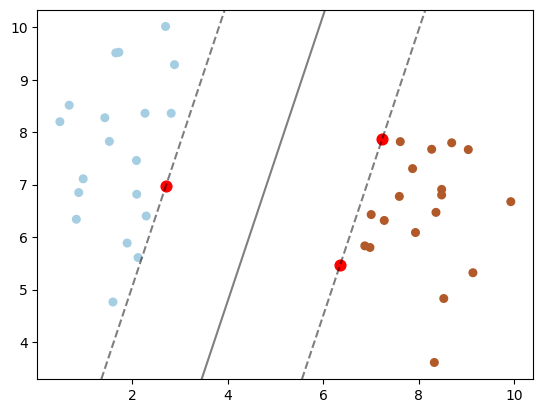

In [15]:
# SVM 결과  시각화
# 샘플 데이터 표현
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired) 

# 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim() 
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30) 
yy = np.linspace(ylim[0], ylim[1], 30) 
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--']) 

# 지지벡터(Support Vector) 표현
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r') 
plt.show()

In [ ]:
# [실습] SVM을 이용한  wine 데이터  분류하기

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm

# Load dataset
wine = datasets.load_wine()
# Split dataset into training set and test set, 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, 
random_state=109)

# kernel = ‘linear’ 선형 분류, ‘rbf’, ‘poly’ 비선형 분류 
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 
print(clf.score(X_train, y_train))

1.0


### 비지도학습

#### K-means 알고리즘 -> k개의 평균 알고리즘
• K-means 알고리즘은 주어진 n개의 관측값을 k개의 클러스터로 분할하는 알고리즘으로, 관측값들은 거리가 최소인 클러스터로 분류
• 예) 셔츠를 만들어서 판매하는 회사
회사는 시장에 새로운 셔츠 모델을 공개하여야 한다. 회사는 사람들의 키와 체중 
을 조사하여 그래프로 그려보았다고 하자. 셔츠의 크기는 어떻게 결정해야 하는 
가?

#### K-means 알고리즘
•  입력값: 클러스터 수 k,  n개의 데이터

•  출력값: k개의 클러스터

•  비용 함수(cost function)
- 거리 기반, 클러스터의 중심과 클러스터 내의 데이터와의 거리

•  알고리즘
1. 집합 D에서 k개의 데이터를 임의로 추출하고, 이 데이터들을 각 클러스터의 중심 
(centroid)으로 설정한다. 또는 k개의 랜덤한 값을 클러스터의 중심으로 설정한다. (초 
기값 설정)

2. 집합 D의 각 데이터에 대해 k개의 클러스터 중심과의 거리를 계산하고, 각 데이터가 어 
느 중심점 (centroid)와 가장 유사도가 높은지 알아낸다. 그리고 그렇게 찾아낸 중심점 
으로 각 데이터들을 할당한다.

3. 클러스터의 중심점을 다시 계산한다. 즉, 2에서 재할당된 클러스터들을 기준으로 중심점 
을 다시 계산한다.

[[16.66666667 15.83333333]
 [72.16666667 75.66666667]]


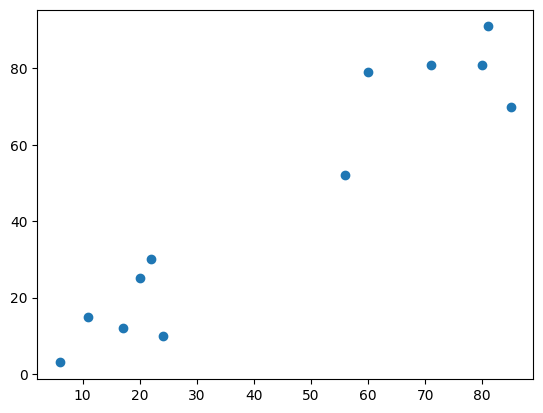

In [18]:
# sklearn을  이용한  K-means 클러스터링

import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

X = np.array([[6,3], [11,15], [17,12], 
[24,10], [20,25], [22,30], [85,70], 
[71,81], [60,79], [56,52], [81,91], 
[80,81]])

plt.scatter(X[:,0],X[:,1]) 

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

[0 0 0 0 0 0 1 1 1 1 1 1]


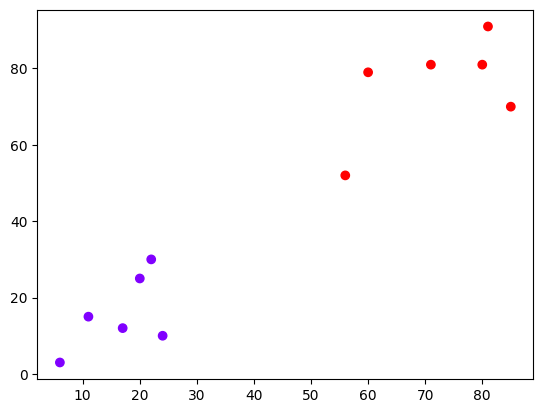

In [20]:
print(kmeans.labels_)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap= "rainbow") 
plt.show()

### K-means 알고리즘의  한계점
• 계산 시간이 많이 필요함(NP-hard problem)
• 이상값(outlier)에 민감
• 구형(spherical)이 아닌 클러스터를 찾는 데에는 부적절

#### • k는 어떻게 결정?
⁻ k값에 따라 결과가 크게 달라짐

### k를  결정하는  방법
• "팔꿈치" 방법(elbow method)
⁻ k를 1부터 증가시키면서 K-means 클러스터링을 수행하고, 각 k의 값에 대하여 SSE(sum of squared errors)의 값을 계산


### k를  결정하는  방법
• 계산된 SSE에 대한 꺾은선 그래프
• 꺾은선 그래프에서 팔의 “팔꿈치”에 해당하는 k값이 가장 좋은 값


• k가 커지면 SSE는 0으로 수렴, 낮은 SSE를 갖는 k중 가장 작은 값 선택
• 데이터 자체에 명시적인 클러스터가 없는 경우, 명확한 팔꿈치 없을 수 있음

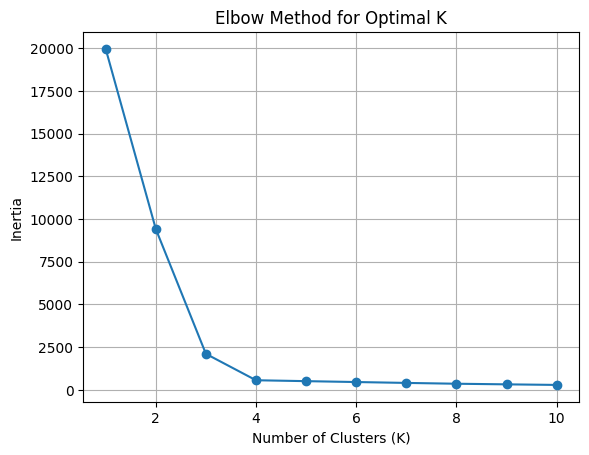

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

# 데이터 생성 (임의의 데이터 생성)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# 클러스터 개수 범위 설정
clusters_range = range(1, 11)
inertia_values = []  # 군집 내 분산 (inertia)를 저장할 리스트

# 각 클러스터 개수에 대한 K-Means 모델 학습 및 inertia 값 계산
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# inertia 값들을 시각화하여 팔꿈치 방법으로 최적의 클러스터 개수 결정
plt.plot(clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')              
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')       
plt.grid()
plt.show()

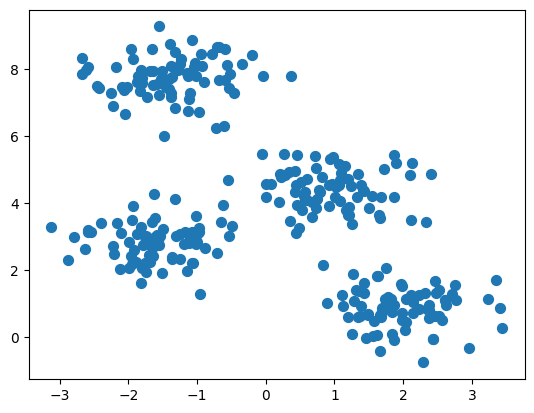

In [26]:
# [실습] K-means 알고리즘

# sklearn.datasets의  make_blobs()하는 함수 이용 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0 ) 
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

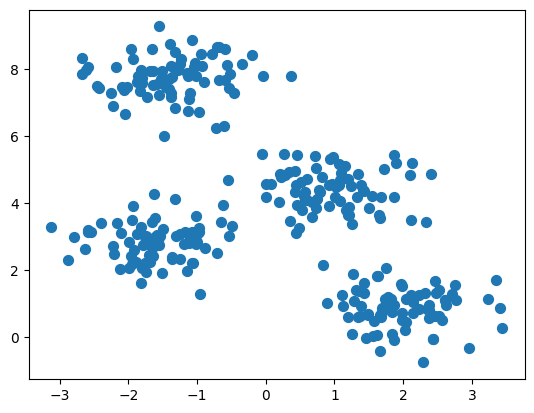

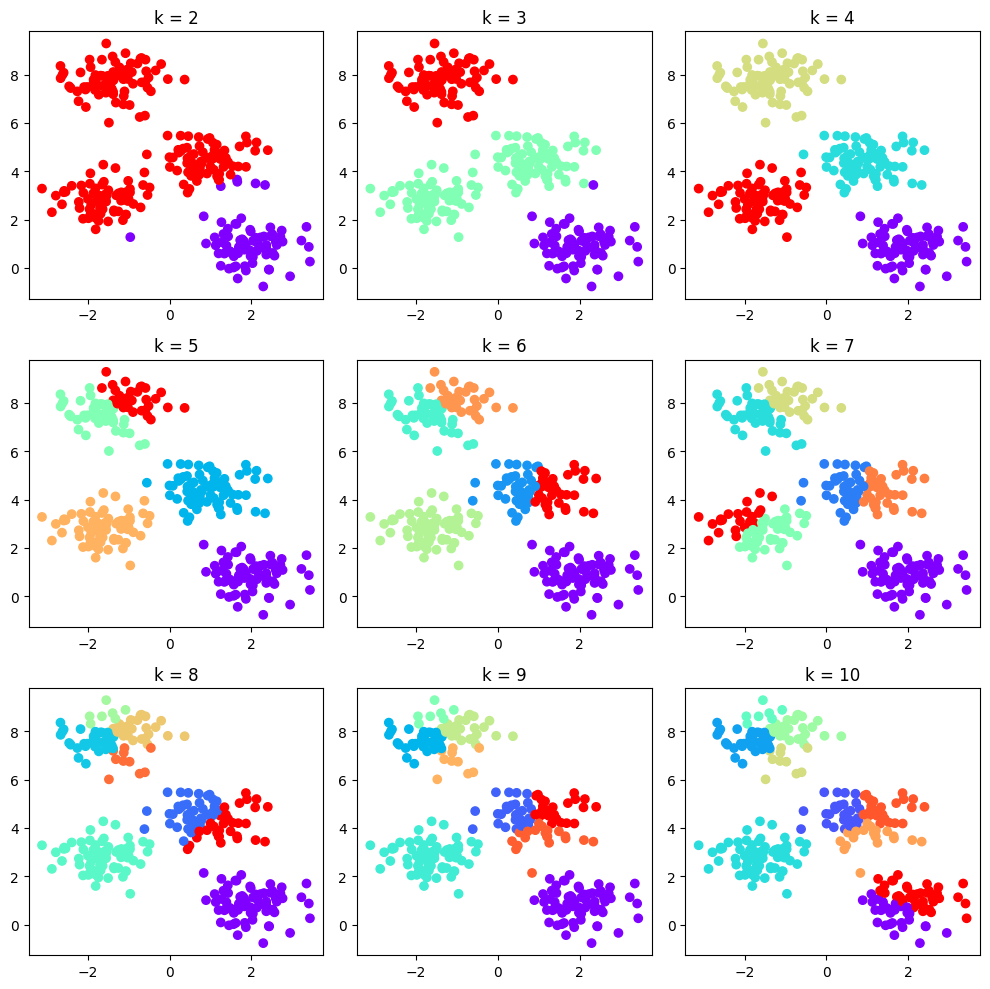

In [29]:
# sklearn.datasets의 make_blobs()하는 함수 이용 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

# 데이터 생성 (임의의 데이터 생성)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0) 
plt.scatter(X[:, 0], X[:, 1], s=50)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10)) 

# 각 서브 플롯에 데이터를 그리기
for i, ax in enumerate(axes.flat):
    kmeans = KMeans(n_clusters=i+2, n_init=1, random_state=42) 
    kmeans.fit(X)
    ax.set_title(f"k = {i+2}")
    ax.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow') 
    
# 그리드 간 간격 조정
plt.tight_layout() 
plt.show()

### 주성분분석  PCA Principal Component Analysis
• 특징들이 통계적으로 상관관계가 없도록 데이터 셋을 회전시키는 기술 
→ 차원 축소(dimensionality reduction)
• 데이터를 잘 설명할 수 있는 중요한 특징 일부만 선택
→ 특징 추출(feature extraction), 기존 특징(변수)을 조합해 새로운 변수 생성

* PCA 원리 설명 블로그 추천 : https://ratsgo.github.io/machine%20learning/2017/04/24/PCA/ 

* https://www.youtube.com/watch?v=FgakZw6K1QQ




• 데이터의 분산(variance) 
을 최대한 보존하면서 서 로 직교하는 새 기저(축)를 찾아, 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환
• 각 특징별 중요도에 따라 특징을 선택하여 사용 가능
⁻ 다중 공선성 및 과도한 적합성을 해결
⁻ 계산 속도 향상

In [30]:
!pip install mglearn

   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   --------------------------------------- 581.4/581.4 kB 38.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/313.5 kB ? eta -:--:--
   ---------------------------------------- 313.5/313.5 kB ? eta 0:00:00


In [32]:
# PCA를  이용한  유방암  데이터  성분  분석
import matplotlib.pyplot as plt 
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

cancer = load_breast_cancer()
# StandardScaler를 사용해 각 특징의 분산이 1이 되도록 스케일 조정 
standard_scaler = StandardScaler()
standard_scaler.fit(cancer.data)
X_scaled = standard_scaler.transform(cancer.data) 

# 주성분 2개만 사용하는 모델 생성
pca = PCA(n_components=2) 
pca.fit(X_scaled)

PCA(n_components=2)

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


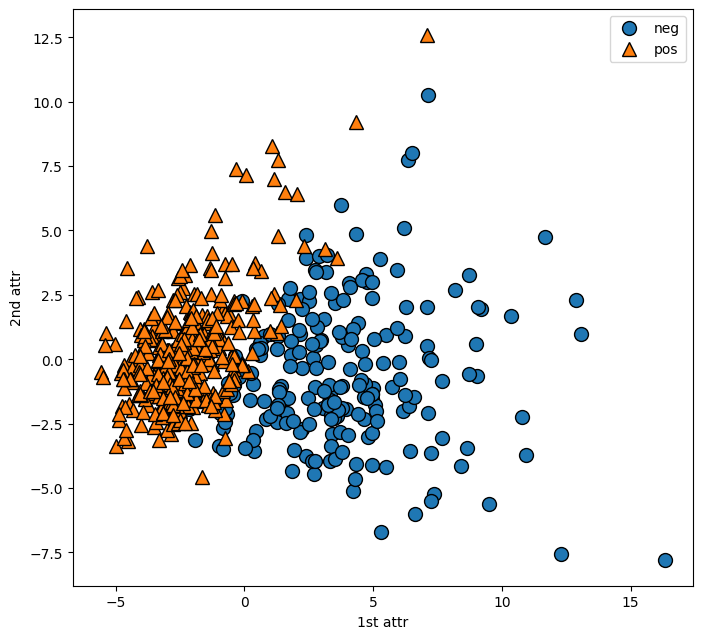

In [33]:
# PCA를  이용한  유방암  데이터  변환

# 두 개의 주성분을 사용해 데이터 변환 
X_pca = pca.transform(X_scaled)

print("원본 데이터 형태 : {}".format(str(X_scaled.shape))) 
print("축소된 데이터 형태 : {}".format(str(X_pca.shape))) 
# 원본 데이터 형태 : (569, 30)
# 축소된 데이터 형태 : (569, 2)

# 시각화
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)

plt.legend(["neg","pos"],loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("1st attr")
plt.ylabel("2nd attr")
plt.show()

#### PCA 응용  예시
• 얼굴 주성분 분석 (sklearn.datasets.fetch_lfw_people)

#### t-SNE를  이용한  매니폴드  학습
• 매니폴드 학습(Manifold Learning)
⁻   위상학 개념을 빌린 차원 축소 방법 → 데이터 시각화에 효율적이다.
⁻   매니폴드: 국소적으로 유클리드 공간과 동형인 공간
⁻   국소적으로 차원 축소 투영 관계를 만들고 이 관계를 전역으로 확장 
⁻   탐색적 데이터 분석에 유용

• t-SNE(t-distributed Stochastic Neighbor Embedding) 
⁻   가장 강력한 매니폴드 학습 알고리즘 중 하나
⁻   데이터 차원 축소와 시각화 방법
⁻   단어 벡터와 같이 고차원 데이터를 시각화하는 데 가장 인기있는 알고리즘

### PCA를  이용한  차원  감소의  문제점
• 선형 분석 방식으로 값을 사상하기 때문에 차원이 감소되면서 군집화(위치) 정보 
가 소실

### t-SNE에서  데이터의  유사도  측정  방법

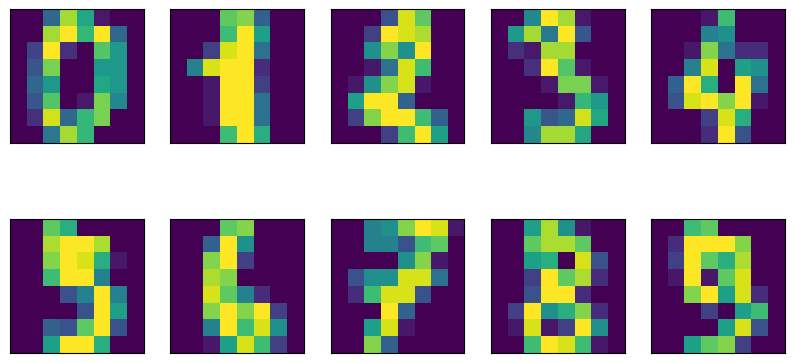

In [35]:
# 숫자  이미지  데이터
from sklearn.datasets import load_digits 
import matplotlib.pyplot as plt

digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks':()}) 
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img) 
plt.show()

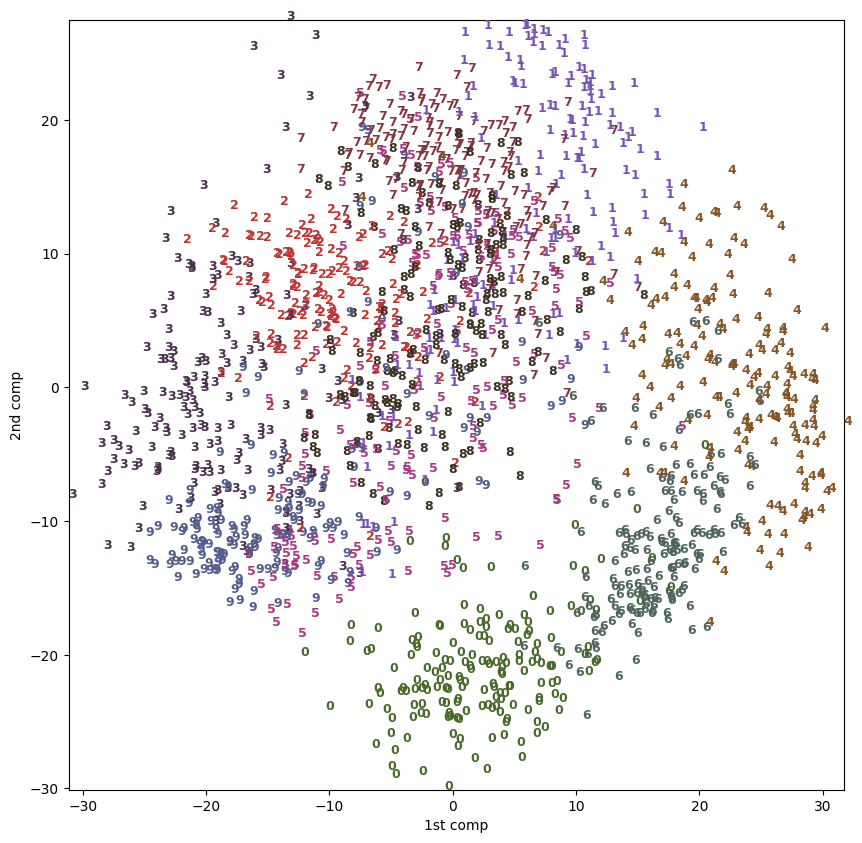

In [36]:
# 주성분  2개를  이용한  숫자  데이터  산점도  (PCA)
from sklearn.decomposition import PCA 
from sklearn.datasets import load_digits 
import matplotlib.pyplot as plt

digits = load_digits()

pca = PCA(n_components=2) 
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", 
"#3A3120", "#535D8E"]

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color=colors[digits.target[i]], 
fontdict={'weight':'bold', 'size':9})
plt.xlabel("1st comp")
plt.ylabel("2nd comp")
plt.show()

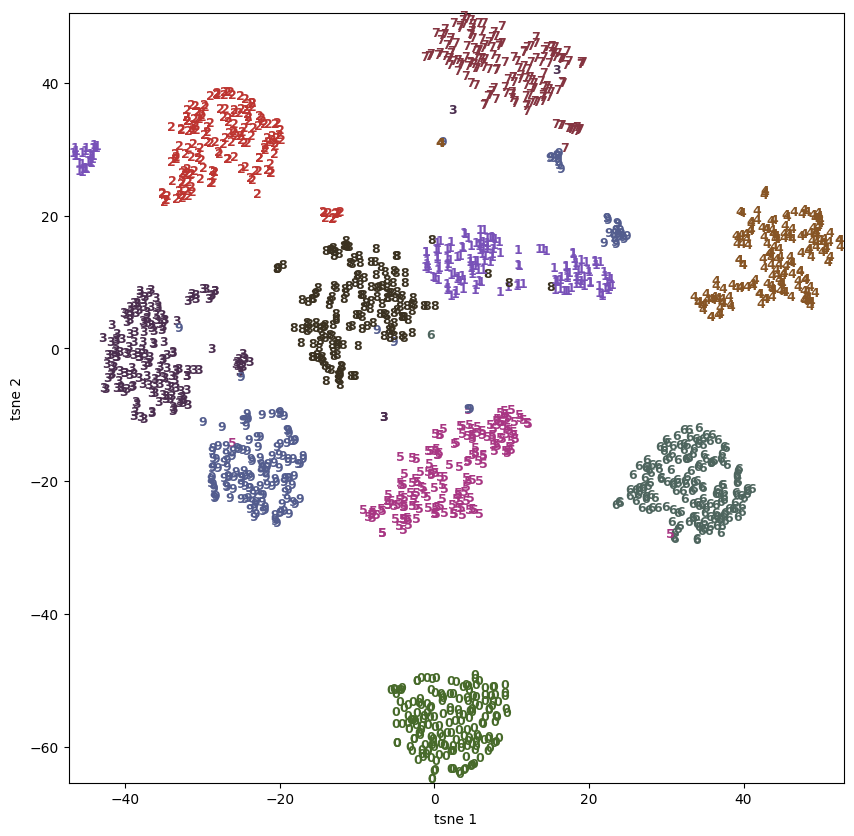

In [37]:
# t-SNE를  이용한  숫자  데이터  산점도
from sklearn.manifold import TSNE 
from sklearn.datasets import load_digits 
import matplotlib.pyplot as plt

digits = load_digits()

tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", 
"#3A3120", "#535D8E"]

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color=colors[digits.target[i]], 
fontdict={'weight':'bold', 'size':9})
plt.xlabel("tsne 1")
plt.ylabel("tsne 2")
plt.show()